# Target to predict heart disease 

### its a categorical variable that we want to predict

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
df = pd.read_csv('heart.csv')
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


# check data reliability

In [2]:
df['HeartDisease'].value_counts()  #so the distribution of the data is good so i can train the model on it


HeartDisease
1    508
0    410
Name: count, dtype: int64

<Axes: xlabel='HeartDisease', ylabel='count'>

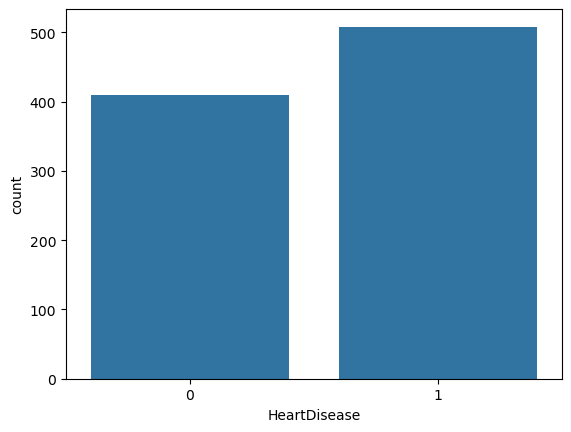

In [3]:
sns.countplot(data=df,x=df['HeartDisease'])

# EDA + cleaning

In [4]:
df.shape

(918, 12)

In [5]:
df.describe() #shows only numeric cols

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [7]:
df.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [8]:
df.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

In [11]:
df.duplicated().sum()

np.int64(0)

In [12]:
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

# eda of numerical cols

In [27]:
numeric_cols=['Age','RestingBP','Cholesterol','MaxHR','Oldpeak']

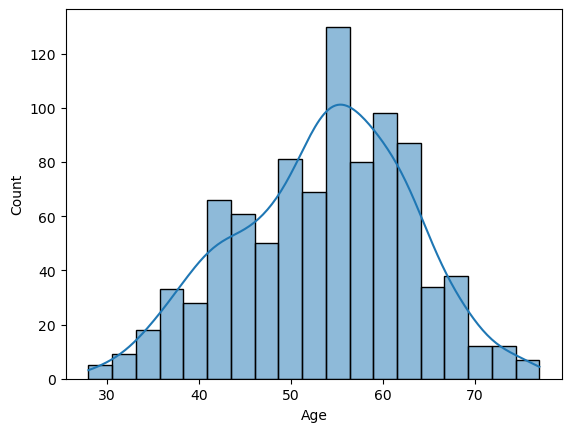

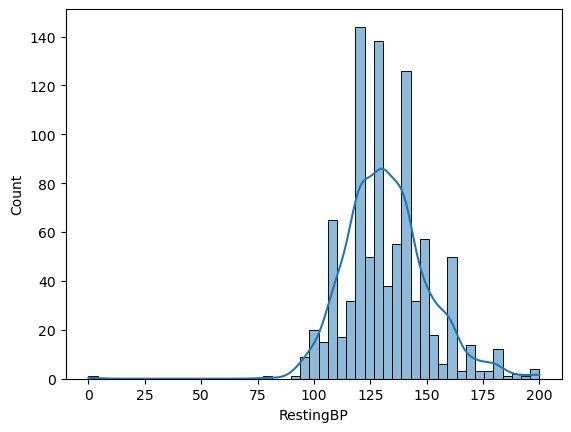

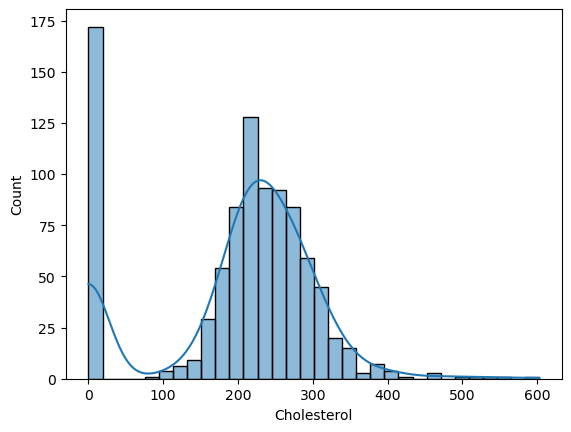

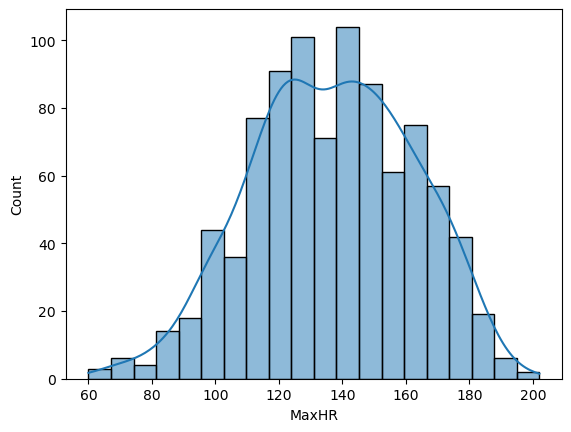

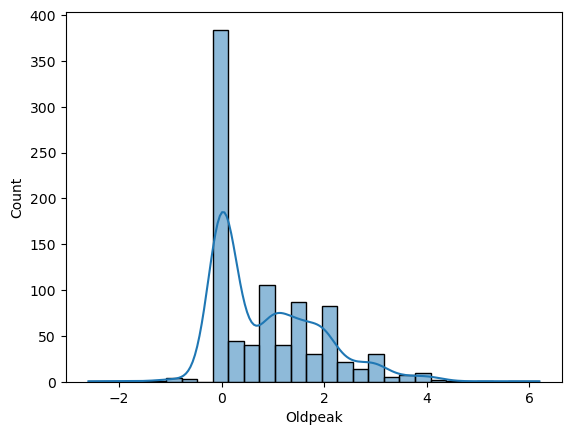

In [28]:
for col in numeric_cols:
    plt.figure();
    sns.histplot(df[col],kde=True)
    

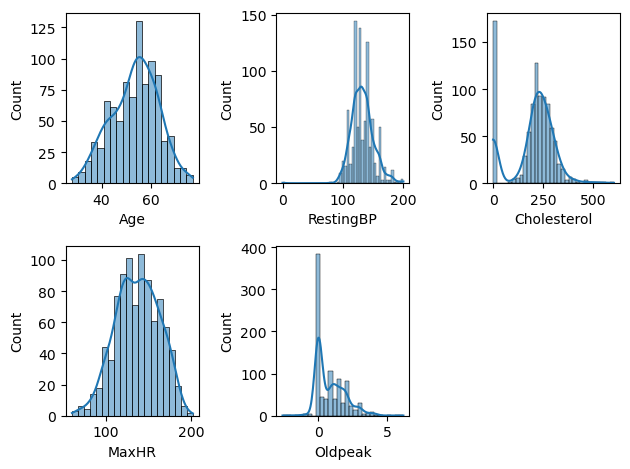

In [35]:
def plotting(var,num):
    plt.subplot(2,3,num)
    sns.histplot(df[var],kde=True)

plotting('Age',1)
plotting('RestingBP',2)
plotting('Cholesterol',3)
plotting('MaxHR',4)
plotting('Oldpeak',5)

plt.tight_layout() #so that the counts may not overlap , visually appealing 

In [ ]:
#the resting bp is 0 that is a wrong vlaue , 0 cannot be bp even if  a person is dead , so its wrong data
#so many people has 0 cholesterol , that is impossible , so its wrong data ,fill them with mean 
#so we need to clean that data again

In [39]:
#cholesterol mean (excluding the zero) 
ch_mean=df.loc[df['Cholesterol']>0,'Cholesterol'].mean()
ch_mean

np.float64(244.6353887399464)

In [46]:
#now replace the mean in the places of 0
df['Cholesterol']=df['Cholesterol'].replace(0,ch_mean)
df['Cholesterol']=df['Cholesterol'].round(2) # 244.6353887399464 = 244.64
df['Cholesterol'].value_counts()

Cholesterol
244.64    172
254.00     11
220.00     10
223.00     10
204.00      9
         ... 
353.00      1
278.00      1
157.00      1
176.00      1
131.00      1
Name: count, Length: 222, dtype: int64

<Axes: xlabel='Cholesterol', ylabel='Count'>

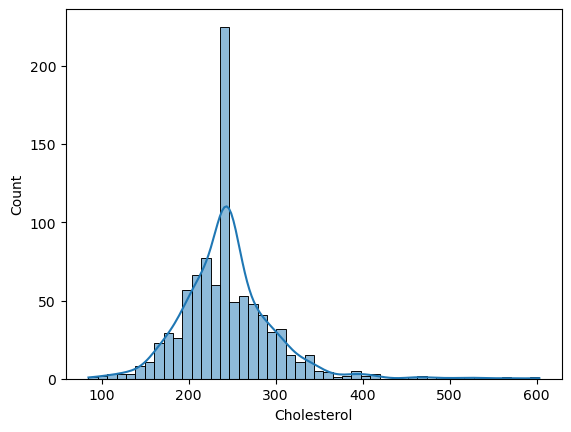

In [47]:
sns.histplot(df['Cholesterol'],kde=True)

<Axes: xlabel='RestingBP', ylabel='Count'>

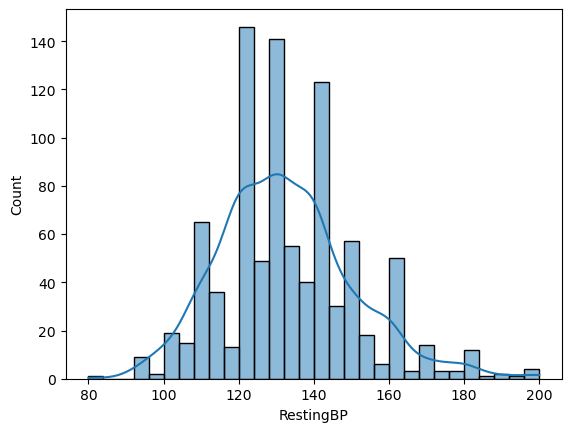

In [51]:
#do same for resting bp
rb_mean=df.loc[df['RestingBP']>0,'RestingBP'].mean()  #132.54089422028352
df['RestingBP']=df['RestingBP'].replace(0,rb_mean)
df['RestingBP']=df['RestingBP'].round(2)  #132.54089422028352=132.54
sns.histplot(df['RestingBP'],kde=True)

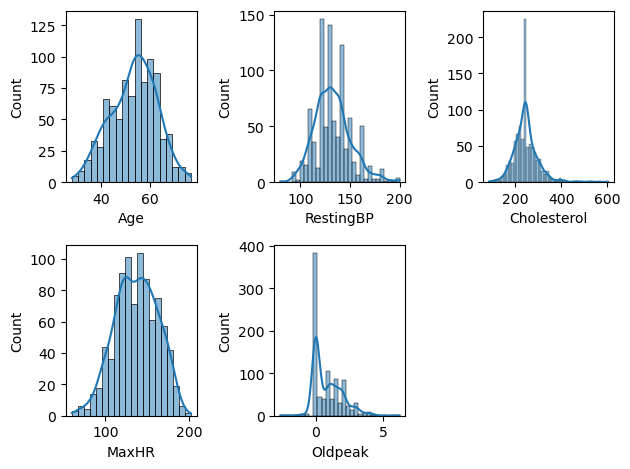

In [54]:
def plotting(var,num):
    plt.subplot(2,3,num)
    sns.histplot(df[var],kde=True)

plotting('Age',1)
plotting('RestingBP',2)
plotting('Cholesterol',3)
plotting('MaxHR',4)
plotting('Oldpeak',5)
plt.tight_layout()


# now time to do eda of categorical cols

In [55]:
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [56]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140.0,289.0,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160.0,180.0,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130.0,283.0,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138.0,214.0,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150.0,195.0,0,Normal,122,N,0.0,Up,0


In [57]:
df['FastingBS'].value_counts() #its categorical

FastingBS
0    704
1    214
Name: count, dtype: int64

In [61]:
categorical_cols=['Sex','ChestPainType','FastingBS','RestingECG','ExerciseAngina','ST_Slope','HeartDisease']

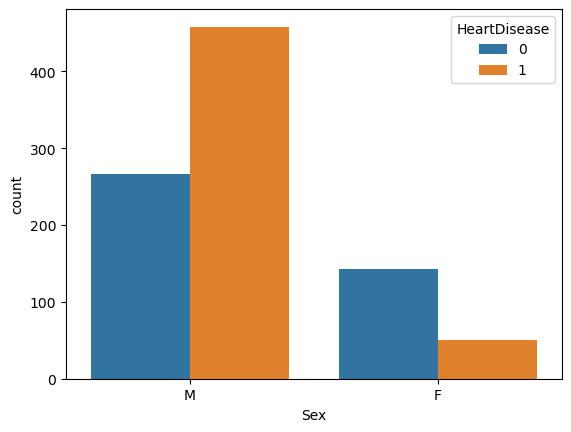

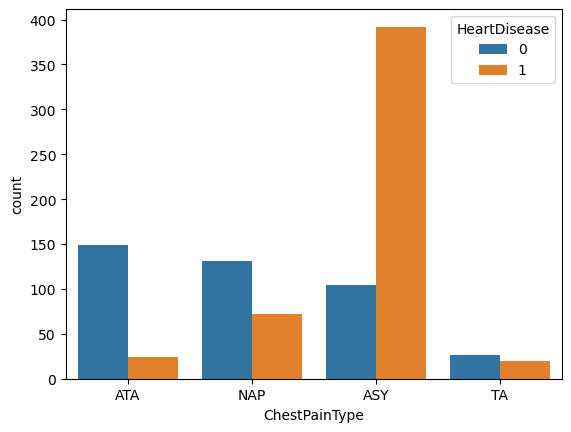

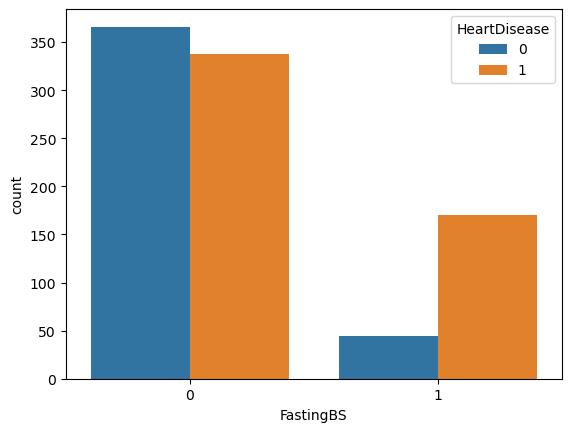

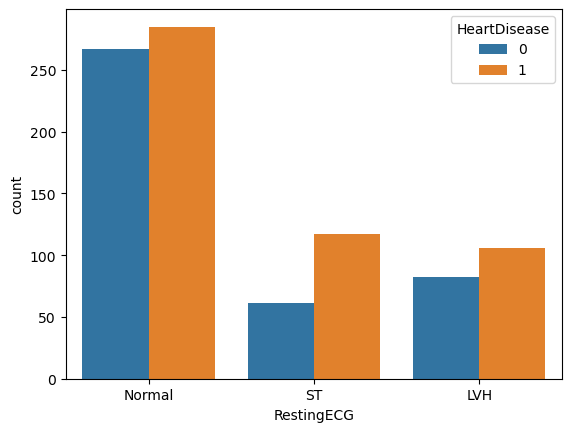

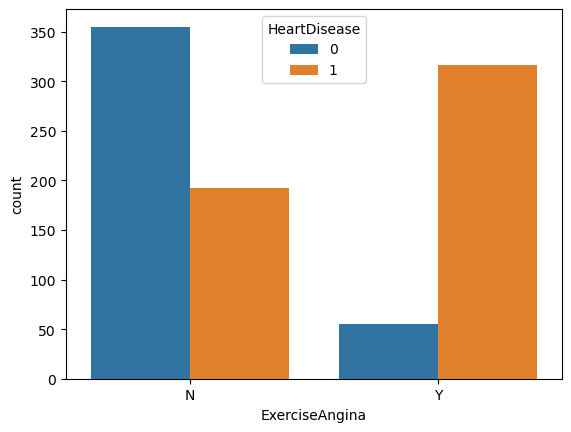

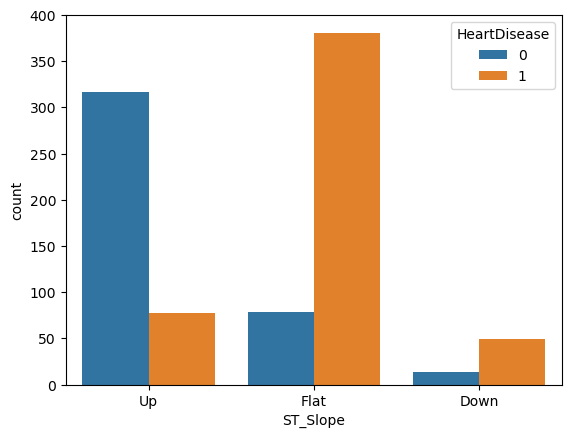

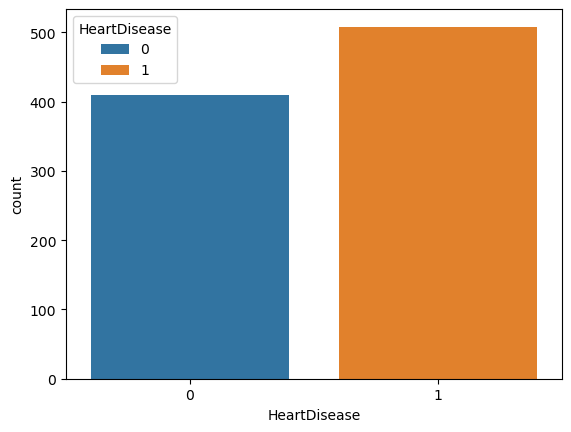

In [63]:
for cols in categorical_cols:
    plt.figure()
    sns.countplot(data=df,x=df[cols],hue='HeartDisease')

# lets check relation of numeric cols and categorical col (heart diesease)

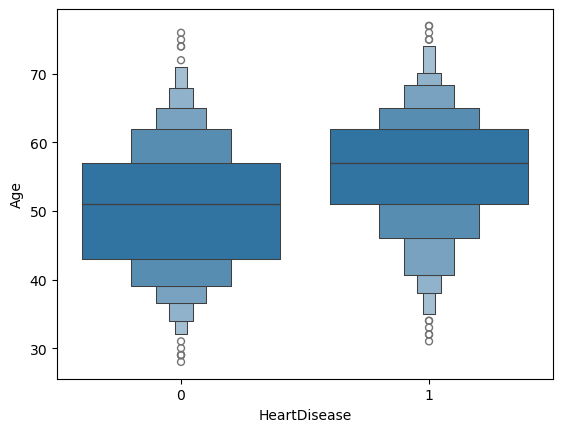

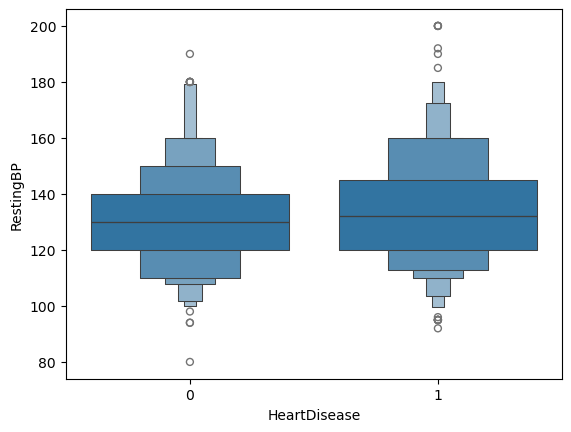

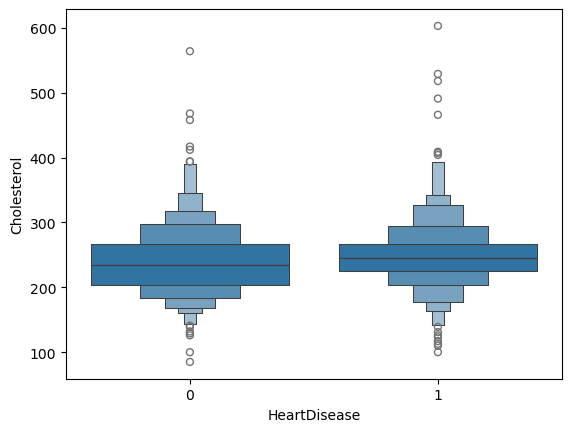

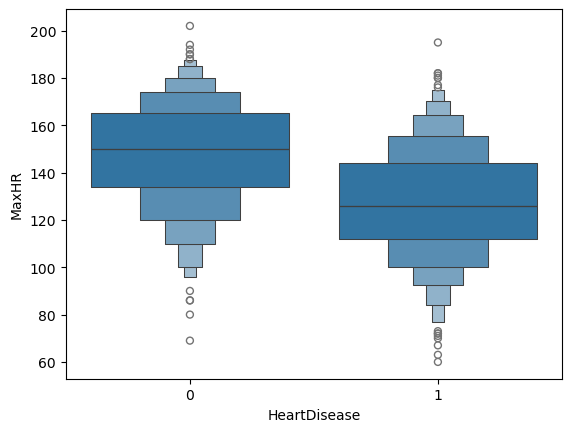

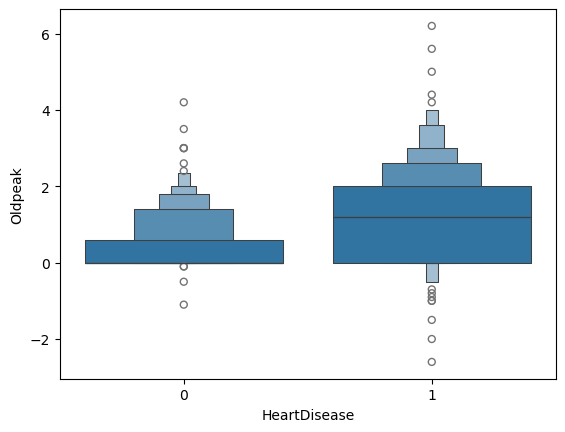

In [67]:
for cols in numeric_cols:
    plt.figure()
    sns.boxenplot(x='HeartDisease',y=df[cols],data=df)

<Axes: >

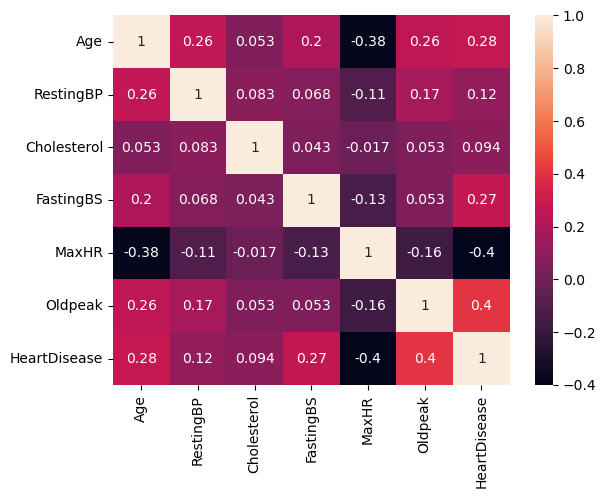

In [69]:
sns.heatmap(df.corr(numeric_only=True),annot=True)

# data preprocessing 

In [71]:
# no need to do it by each col do it in one go
df_encode=pd.get_dummies(df,drop_first=True)
df_encode

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,40,140.0,289.0,0,172,0.0,0,True,True,False,False,True,False,False,False,True
1,49,160.0,180.0,0,156,1.0,1,False,False,True,False,True,False,False,True,False
2,37,130.0,283.0,0,98,0.0,0,True,True,False,False,False,True,False,False,True
3,48,138.0,214.0,0,108,1.5,1,False,False,False,False,True,False,True,True,False
4,54,150.0,195.0,0,122,0.0,0,True,False,True,False,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,110.0,264.0,0,132,1.2,1,True,False,False,True,True,False,False,True,False
914,68,144.0,193.0,1,141,3.4,1,True,False,False,False,True,False,False,True,False
915,57,130.0,131.0,0,115,1.2,1,True,False,False,False,True,False,True,True,False
916,57,130.0,236.0,0,174,0.0,1,False,True,False,False,False,False,False,True,False


In [72]:
df_encode.astype(int)

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0,0,1,1,0,0,1,0,0,0,1
1,49,160,180,0,156,1,1,0,0,1,0,1,0,0,1,0
2,37,130,283,0,98,0,0,1,1,0,0,0,1,0,0,1
3,48,138,214,0,108,1,1,0,0,0,0,1,0,1,1,0
4,54,150,195,0,122,0,0,1,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,110,264,0,132,1,1,1,0,0,1,1,0,0,1,0
914,68,144,193,1,141,3,1,1,0,0,0,1,0,0,1,0
915,57,130,131,0,115,1,1,1,0,0,0,1,0,1,1,0
916,57,130,236,0,174,0,1,0,1,0,0,0,0,0,1,0


# standard scalling

In [73]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
numeric_cols

['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']

In [74]:
df_encode[numeric_cols]=scaler.fit_transform(df_encode[numeric_cols])
df_encode

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,-1.433140,0.414853,0.832513,0,1.382928,-0.832432,0,True,True,False,False,True,False,False,False,True
1,-0.478484,1.527192,-1.212938,0,0.754157,0.105664,1,False,False,True,False,True,False,False,True,False
2,-1.751359,-0.141317,0.719919,0,-1.525138,-0.832432,0,True,True,False,False,False,True,False,False,True
3,-0.584556,0.303619,-0.574908,0,-1.132156,0.574711,1,False,False,False,False,True,False,True,True,False
4,0.051881,0.971022,-0.931454,0,-0.581981,-0.832432,0,True,False,True,False,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,-0.902775,-1.253656,0.363372,0,-0.188999,0.293283,1,True,False,False,True,True,False,False,True,False
914,1.536902,0.637321,-0.968986,1,0.164684,2.357094,1,True,False,False,False,True,False,False,True,False
915,0.370100,-0.141317,-2.132453,0,-0.857069,0.293283,1,True,False,False,False,True,False,True,True,False
916,0.370100,-0.141317,-0.162065,0,1.461525,-0.832432,1,False,True,False,False,False,False,False,True,False
